In [8]:
"""
RationalPopulationGrowth.ipynb

Braden Oh, Melissa Anthony
ModSim Fall 2017, Olin College of Engineering

During the course of working through the Chapter 3 ModSim notebook it 
was discovered by a number of students that the population growth data
for the years 0AD-2015 fits a rational function flipped over the
y-axis and shifted to the right.  The purpose of this notebook is to
attempt to answer the question:

"Why does the population behave this way?"

Our assumption going in (09/23/2017) is that a number of time windows
exist in recent time frames (~1700-present) that resulted in rapid
growth spikes.  Our thought is that the aggregate graph of these time
windows' best fit curves will sum to a rational curve.  

This notebook will attempt to generate a number of graphs for varying 
time windows of relevance within the time period 0AD-2017 and aggregate
them together, hopefully mapping events in human history to population
spikes that will aggregate to fit a rational function.

"""

# Set environmental settings
# --------------------------------------
%matplotlib inline

# Import necessary libraries
# --------------------------------------
from modsim import *
from pandas import read_html
from pandas import read_excel
from pandas import read_csv

print("Cell ran successfully")

Cell ran successfully


The following cell imports the necessary data files for this simulation and test-prints various parts of those files (once imported) to verify that the import worked successfully:

In [9]:
# Import necessary data
# --------------------------------------
WikiDataTable = read_html('World_population_estimates.html', header=0, index_col=0, decimal='M')
ExcelDataTable = read_excel(io='PopData.xlsx', header=0, index_col=0)
CSVDataTable = read_csv('populationData.csv', header=0, index_col=1)

print("Imports successful")


# Format and test the Wikipedia data
# --------------------------------------
# Select the portion of the wikipedia data table that holds recent data
WikiRecentData = WikiDataTable[2]

# Change the names of each of the columns
WikiRecentData.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

# Execute the head function to verify the import worked
WikiRecentData.head()


# Format and test the Excel data
# --------------------------------------
# Requires no formatting changes, so go ahead and run the head function
ExcelDataTable.head()


# Format and test the CSV data
# --------------------------------------
# Requires no formatting changes, so go ahead and run the head function
CSVDataTable.head()

Imports successful


,Source,Pop
Year,,
1,Biraben (1980),252000000.0
1,Clark (1967),256000000.0
1,"Durand (1974), lower",270000000.0
1,"Durand (1974), upper",330000000.0
1,Grigg (1987),256000000.0


Each data is a pandas DataFrame object.  This object has a bunch of obnoxious characteristics, so here's a cheat sheet of useful ways to reference things

`DataFrame.columns` outputs a pandas Index object

`DataFrame.<column name>` outputs a pandas Series object, pairing items from the index column with items in the column name you wanted to access

`DataFrame.index`, when using years as the index, outputs a pandas Int64Index object

In [10]:
popSeries = CSVDataTable.Pop  # popSeries is a pandas Series object
popSeries.values              # this is an array of just the values of the series
popSeries[1]                  # this accesses all values of popSeries that correspond to an index value of (year) 1

1    252000000.0
1    256000000.0
1    270000000.0
1    330000000.0
1    256000000.0
1    188239090.4
1    300000000.0
1    252000000.0
1    230820000.0
1    170000000.0
1    170000000.0
1    188239090.0
1    200000000.0
Name: Pop, dtype: float64

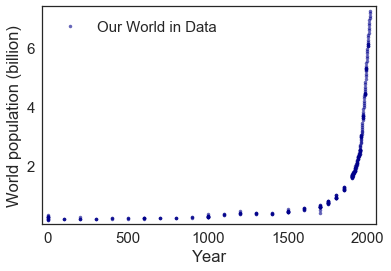

In [129]:
def plot_data(data, labelin='', xlabelin='', ylabelin='', shapein='.', colorin='darkblue'):

    scaled_data = data / 1e9
    plot(scaled_data, shapein, color=colorin, label=labelin)
        
    decorate(xlabel=xlabelin,
             ylabel=ylabelin)
    
newfig()
plot_data(CSVDataTable.Pop, 'Our World in Data', 'Year', 'World population (billion)')

In [74]:
def generate_time_windows(table, num_periods):
    
    # The years with available data are stored in table.index
    # There are duplicate years in the index so we call set() to strip out these duplicates
    available_years = list(set(table.index))
    available_years.sort()
    print(available_years)
    
    # The nominal time window (period) is the range of the data divided by the number of desired periods
    # NOTE: THIS ASSUMES A SORTED DATA SET
    nominal_period = round((available_years[len(available_years)-1] - available_years[0]) / num_periods)
    
    # This nominal period won't line up in most circumstances so we need to set up windows to the next highest available year:
    
    time_windows = []       # Prepare to collect a list of tuples
    t = available_years[0]  # Determine the first year to start on
    
    while (t < (available_years[len(available_years)-1]-nominal_period)):   # Keep running while t is less than the max year
        
        tfinal = t + nominal_period  # Calculate the nominal time window
        
        while int(tfinal) not in available_years:  # While tfinal (nominal) is not in the available data set,
            tfinal += 1                    # add one to tfinal and check again
            
        time_window = (int(t), int(tfinal))           # Establish a tuple recording t and tfinal
        time_windows.append(time_window)    # Append this tuple to the time_windows array
        
        t = tfinal                  # Update the value of t and run the loop again
        
        # If the last time period is reached...
        if ((t + nominal_period) > available_years[len(available_years)-1]):
            time_window = (int(t), int(available_years[len(available_years)-1]))
            time_windows.append(time_window)
        
    return time_windows    # Return a final set of time windows marked by available years

#-----------------------------------------------------------------------------------------------------        

windows = generate_time_windows(CSVDataTable, 100)
#windows

[1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1750, 1800, 1850, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


[(1, 100),
 (100, 200),
 (200, 300),
 (300, 400),
 (400, 500),
 (500, 600),
 (600, 700),
 (700, 800),
 (800, 900),
 (900, 1000),
 (1000, 1100),
 (1100, 1200),
 (1200, 1300),
 (1300, 1400),
 (1400, 1500),
 (1500, 1600),
 (1600, 1700),
 (1700, 1750),
 (1750, 1800),
 (1800, 1850),
 (1850, 1900),
 (1900, 1920),
 (1920, 1940),
 (1940, 1960),
 (1960, 1980),
 (1980, 2000),
 (2000, 2014)]

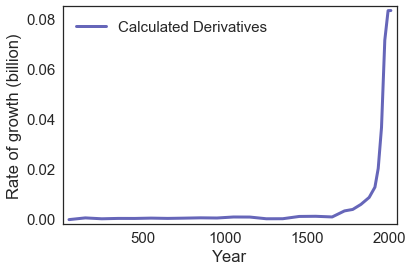

In [193]:
def calculate_pop_derivatives(table, windows):
    
    window_dts = []   # Prepare to hold a list of tuples
    
    # For each (start, end) tuple in the windows array...
    for window in windows:
        p0 = float(table.Pop[window[0]].mean())    # Take intial population as the mean of the first year's data set
        pf = float(table.Pop[window[1]].mean())    # Take final population as the mean of the second year's data set

        dt = float((pf-p0)/(float(window[1])-float(window[0])))  # Take the average derivative as the slope of the endpoints

        window_dt = (float(window[0]), float(window[1]), dt)  # Store the derivative in a tuple (t0, tf, dt)
        window_dts.append(window_dt)          # and store that tuple in the top level array

    # Using lists of tuples is going to be messy in the next section, so let's make a DataFrame object:
    t0Array = []
    tfArray = []
    dtArray = []
    mpArray = []
    for window in window_dts:  # Start by making lists for each column of the DataFrame
        t0Array.append(window[0])
        tfArray.append(window[1])
        dtArray.append(window[2])
        mpArray.append((window[0]+window[1])/2)
        
    dtDataFrame = pd.DataFrame({'t0':t0Array,'tf':tfArray,'dt':dtArray, 'mp':mpArray})  # Initialize the DataFrame itself
    dtDataFrame = dtDataFrame.set_index('mp')  # Set the indexes to be the midpoints of each time window
    
    return dtDataFrame

#-----------------------------------------------------------------------------------------------------        

derivativeSet = calculate_pop_derivatives(CSVDataTable, windows)

newfig()
plot_data(derivativeSet.dt, "Calculated Derivatives", "Year", "Rate of growth (billion)",'-')


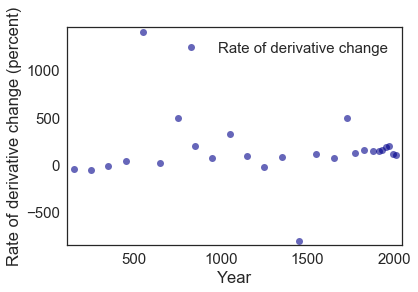

In [182]:
def calculate_derivative_growth(derivativeSeries):
    
    dts = derivativeSeries.values   # Extract a list of derivatives from the series
    yrs = list(derivativeSeries.index)   # Extract a list of years from the series
    yrs.pop(0)

    change_array = []           # Prepare to collect a list of change percentages
    
    for i in range(0, len(dts)-1):
        percent_change = dts[i+1] / dts[i]  * 100    # Calculate the percent change from dts[i] to dts[i+1]
        change_array.append(percent_change)          # Store that percent change in the change_array
    
    dtDataFrame = pd.DataFrame({'Year':yrs,'percent_change':change_array})  # Initialize a DataFrame object
    dtDataFrame = dtDataFrame.set_index('Year')  # Set the indexes to be the midpoints of each time window
    
    return dtDataFrame
    
#-----------------------------------------------------------------------------------------------------        

derivativePercentChanges = calculate_derivative_growth(derivativeSet.dt)
newfig()
plot_data(derivativePercentChanges*1e9, "Rate of derivative change", "Year", "Rate of derivative change (percent)",'o')

In [183]:
print(derivativePercentChanges)

        percent_change
Year                  
150.0       -49.640878
250.0       -55.520121
350.0       -18.871659
450.0        42.301280
550.0      1407.335875
650.0        18.762676
750.0       489.647621
850.0       194.680354
950.0        72.064467
1050.0      319.660851
1150.0       95.971359
1250.0      -20.805500
1350.0       85.673823
1450.0     -803.449208
1550.0      107.946613
1650.0       69.657914
1725.0      497.737099
1775.0      119.425402
1825.0      156.119892
1875.0      149.399466
1910.0      148.634580
1930.0      159.983144
1950.0      181.759744
1970.0      196.016704
1990.0      116.545909
2007.0      100.041674


In [202]:
recentPopData = CSVDataTable.Pop.loc[1200.0:]
recentDerivativeSet = derivativeSet.loc[1250.0:]
recentPercentChanges = derivativePercentChanges.loc[1250.0:]

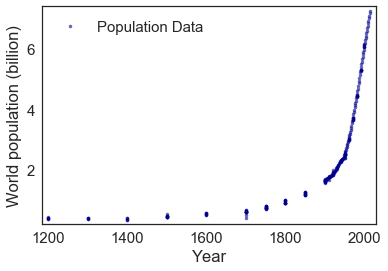

In [203]:
newfig()
plot_data(recentPopData, 'Population Data', 'Year', 'World population (billion)')

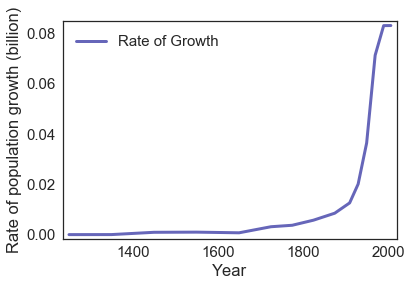

In [209]:
newfig()
plot_data(recentDerivativeSet.dt, 'Rate of Growth', 'Year', 'Rate of population growth (billion)', '-')

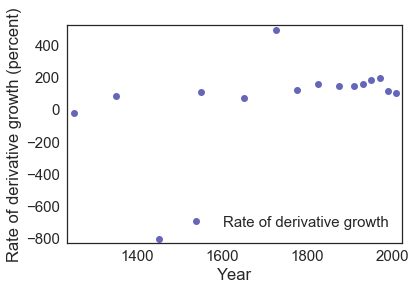

In [207]:
newfig()
plot_data(recentPercentChanges*1e9, 'Rate of derivative growth', 'Year', 'Rate of derivative growth (percent)', "o")

All right!  So we've plotted the actual data and extracted a couple of metrics from it: the rate of change (the derivative) of the population curve, and the percent that the derivative changes relative to itself over each time window.  This percent change gives us a metric we can build a model around - we will generate an array of derivative growths that we can iterate through as a parameter sweep.

In [345]:
import random

def run_simulation(system):
    
    p = system.p0         # Grab the system's initial population
    t = system.t0         # Grab the system's initial time
    tf = system.tf         # Grab the system's final time
    
    period = (tf-t)/system.periods     # Calculate the length of a single period
    
    #print("Period is: " + str(period))
    
    dt = system.init_growth  # Grab the system's intial (seed) population growth rate
    
    pr = system.p_revolution  # Grab the system's probability of a revolution occurring
    pd = system.p_disaster    # Grab the system's probability of a disaster occurring
    dur = int(system.duration)     # Grab the system's duration for a revolution or disaster
    
    high = system.largestAccRate  # Grab the highest rate at which the rate of population growth will change
    low = system.lowestAccRate    # Grab the lowest rate at which the rate of population growth will change
    
    max_high = 4        # Grab the highest growth rate (outlier) that we see in the actual data
    max_low = -6         # Grab the lowest growth rate (outlier) that we see in the actual data
    
    data = TimeSeries()    # Create a TimeSeries to store our data in
    data[t] = p0           # Initialize the first point in the TimeSeries
    
    
    
    accelerationRates = linrange(low, high, (high-low)/system.periods)  # Generate an even parameter sweep of acceleration rates
    
    #print(accelerationRates)
    
    # Those rates are nominal - here's a way to probabilistically add in disasters and revolutions:
    for index in range(0, len(accelerationRates)-1):
        revolution = flip(pr)   # Toggle a boolean to see if a revolution is occurring
        disaster = flip(pd)     # Toggle a boolean to see if a disaster is occurring
        
        if revolution:
            print("Revolution occurred!")
            acc = accelerationRates[index]
            for i in range(index, index + dur):
                acc_change = random.uniform(acc, max_high - acc)
                accelerationRates[index] = acc + acc_change
                
        if disaster:
            print("Disaster occurred!")
            acc = accelerationRates[index]
            for i in range(index, index + dur):
                acc_change = random.uniform(acc, abs(max_low) - acc)
                accelerationRates[i] = acc - acc_change
                    
        index += dur
            
    derivatives = []
    
    for rate in accelerationRates:
        
        dt = dt * (1 + rate)    # Update the population derivative
        derivatives.append(dt)
        t = t+period            # Update the time step
        p = p + (dt * period)   # Update the population
        
        data[t] = p
    #print(derivatives)
    system.results2 = derivatives
    system.results = data
    

Revolution occurred!
Disaster occurred!
Revolution occurred!
Disaster occurred!


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


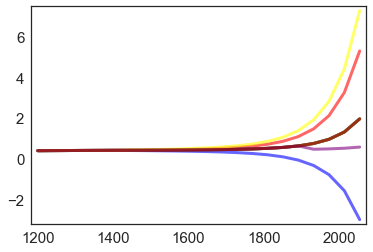

In [360]:
p0 = 392693680         # Set the system's initial population (population in 1200 AD)
t0 = 1200              # Set the system's initial time (in years)
tf = 2014              # Set the system's final time (in years)
periods = 20          # Set the number of periods to iterate through
    
init_growth = 1.173227e+05    # Set the system's initial growth rate to that of 1250AD as extrapolated from our data set
    
p_revolution = 0.01    # Set the system's probability of a revolution occurring
p_disaster = 0.02      # Set the system's probability of a disaster occurring
duration = 2           # Set the system's duration for length of special events IN PERIODS

largestAccRate = 0.8   # Set the highest rate at which the rate of population growth will change
lowestAccRate = -0.2   # Set the lowest rate at which the rate of population growth will change

colors = ['red', 'green', 'blue', 'darkblue', 'orange', 'yellow', 'purple', 'darkred']

for color in colors:
    worldSystem = System(p0=p0, t0=t0, tf=tf, periods=periods, init_growth=init_growth, p_revolution=p_revolution, p_disaster=p_disaster, duration=duration, largestAccRate=largestAccRate, lowestAccRate=lowestAccRate)
    run_simulation(worldSystem)
    plot_data(worldSystem.results, shapein = '-', colorin = color)

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


[93858.160000000003,
 79779.436000000002,
 71801.492400000003,
 315654.07117765857,
 315654.07117765857,
 331436.7747365415,
 364580.45221019565,
 419267.52004172496,
 503121.02405006991,
 628901.28006258735,
 817571.66408136359,
 1103721.7465098409,
 1545210.4451137774,
 2240555.1454149773,
 3360832.718122466,
 5209290.7130898228,
 8334865.1409437172,
 13752527.482557135,
 23379296.720347129,
 40913769.260607474,
 73644784.66909346]

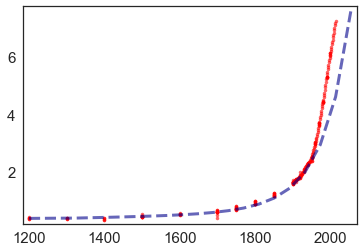

In [394]:
#GOOD_SYSTEM = worldSystem                # HERE I SAVED THE OUTPUT OF ONE GOOD RUN OF THE MODEL
newfig()
plot_data(recentPopData, colorin='red')
plot_data(GOOD_SYSTEM.results, shapein = '--')
GOOD_SYSTEM.results2

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Disaster occurred!
Revolution occurred!
Disaster occurred!
Disaster occurred!
Revolution occurred!
Disaster occurred!
Disaster occurred!


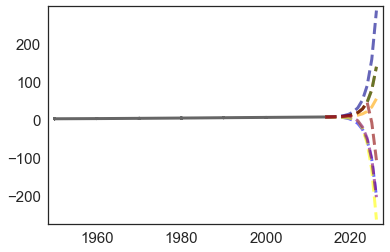

In [389]:
reallyRecentPopData = recentPopData.loc[1950:]

p0 = 7.265786e+09         # Set the system's initial population (population in 1200 AD)
t0 = 2014              # Set the system's initial time (in years)
tf = 2025              # Set the system's final time (in years)
periods = 10          # Set the number of periods to iterate through
    
init_growth = 73644784    # Set the system's initial growth rate to that of 2014 as calculated by our GOOD_DATA set
    
p_revolution = 0.01    # Set the system's probability of a revolution occurring
p_disaster = 0.02      # Set the system's probability of a disaster occurring
duration = 1          # Set the system's duration for length of special events IN PERIODS

largestAccRate = 0.85   # Set the highest rate at which the rate of population growth will change
lowestAccRate = 0.8   # Set the lowest rate at which the rate of population growth will change

colors = ['red', 'green', 'blue', 'darkblue', 'orange', 'yellow', 'purple', 'darkred']

newfig()
plot_data(reallyRecentPopData, shapein='-', colorin='black')

for color in colors:
    worldSystem = System(p0=p0, t0=t0, tf=tf, periods=periods, init_growth=init_growth, p_revolution=p_revolution, p_disaster=p_disaster, duration=duration, largestAccRate=largestAccRate, lowestAccRate=lowestAccRate)
    run_simulation(worldSystem)
    plot_data(worldSystem.results, shapein = '--', colorin = color)